In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from IPython import display
from PIL import Image
from scipy import signal 

In [ ]:
def open_image(image_name):
    open_image = Image.open(image_name).convert('L')
    return open_image

def im_size(image_name):
    img=open_image(image_name)
    return [img.size[0],img.size[1]]

def array_image(opened_image, yl=0, yu=0, xl=0, xu=0):
    if yu==0:
        yu=opened_image.size[1]
    if xu ==0:
        xu=opened_image.size[0]
    array_of_image= np.array(opened_image)[yl:yu, xl:xu]
    return array_of_image 

def plot_array(arr, color='viridis'):
    plt.imshow(arr, cmap=color) 
    
def inv(array, size, yl=0, yu=0, xl=0, xu=0):
    if yu==0:
        yu=size[1]
    if xu==0:
        xu=size[0]
    new_arr= np.fft.fftshift(np.fft.ifft2(np.sqrt(array)))[yl:yu, xl:xu]
    return new_arr

def plot_inv_array(array, color='viridis'):
    plt.figure(figsize=(4, 4), dpi=80)
    plt.imshow(np.log(np.abs(array)), cmap= color)
    
def integer_array(array_int, lower_bound, upper_bound):
    i = lower_bound
    for i in range(lower_bound, upper_bound):
        array_int.append(i)
        i= i+1       
    return array_int
    

In [ ]:
def get_initial_array(image_name, yl=0, yu=0, xl=0, xu=0):
    image_opened = open_image(image_name)
    array_with_image= array_image(image_opened, yl, yu, xl, xu)
    return array_with_image 

def plot_initial_array(image_name, color= 'viridis', yl=0, yu=0, xl=0, xu=0):
    image_opened = open_image(image_name)
    array_with_image= array_image(image_opened, yl, yu, xl, xu)
    plot_array(array_with_image,color )
    
def plot_inverse_fft_array(image_name, initial_array, color='viridis', yl=0, yu=0, xl=0, xu=0):
    image_size= im_size(image_name)
    inverse_fft = inv(initial_array, image_size, yl, yu, xl, xu)
    plot_inv_array(inverse_fft, color)
    
    

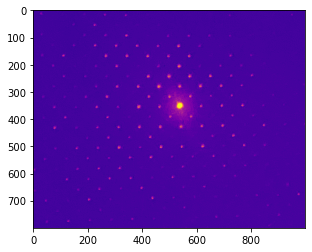

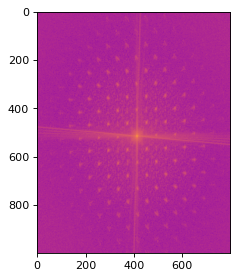

In [ ]:
file_name= '15reddark2.tiff'
array_data = get_initial_array(file_name)
plot_initial_array(file_name, "plasma", 1200, 2000, 1000, 2000)
inverse= inv(array_data, im_size(file_name))
plot_inverse_fft_array(file_name, array_data,'plasma', yl=1500, yu= 2500, xl= 1100, xu=1900)


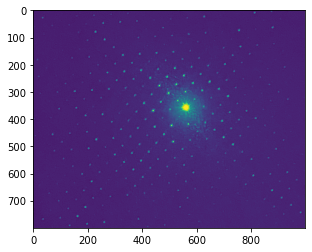

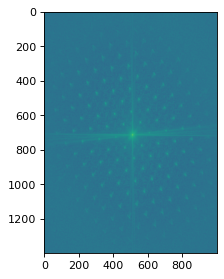

In [ ]:
file_name= '15greendark2.tiff'
array_data = get_initial_array(file_name)
plot_initial_array(file_name,"viridis", 1200, 2000, 1000, 2000)
inverse= inv(array_data, im_size(file_name))
plot_inverse_fft_array(file_name, array_data,'viridis', yl=1300, yu= 2700, xl= 1000, xu=2000)

13.051421683168286


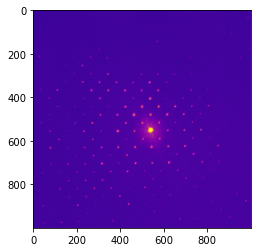

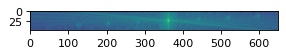

In [ ]:
file_name= '15reddark2.tiff'
array1= get_initial_array(file_name) 
plot_initial_array(file_name, "plasma", 1000, 2000, 1000, 2000)

print(np.mean(array1[np.where(array < 20)]))

array1[np.where(array1 > 200)] = 0
inverse= inv(array1,im_size(file_name))
plot_inverse_fft_array(file_name, array1,'plasma', yl=1500, yu= 2500, xl= 1100, xu=1900)


plt.imshow(np.log(np.abs(inverse[1500+490:1500+540, 1100+50:1100+700])))

#plot_inverse_fft_array(file_name, array,'viridis', yl=485, yu=510, xl=300, xu=700)


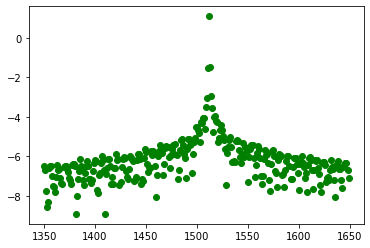

In [ ]:
s = np.sum(inverse[1500+490:1500+540, 1100+50:1100+700], axis=0)

int_array= integer_array([],1100+50, 1100+700)

plt.scatter(int_array[200:500], np.log(np.abs(s)[200:500]), marker='o', color='green')

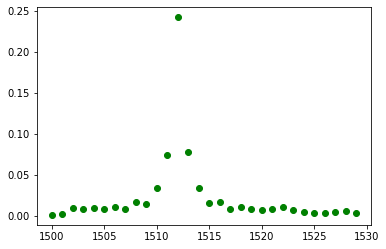

In [ ]:
#plt.imshow(np.log(np.abs(inverse[1500+540:1500+600, 1100+50:1100+700])))
s_new = np.sum(inverse[1500+540:1500+600, 1100+50:1100+700], axis=0)

int_array_new= integer_array([],1100+50, 1100+700)

plt.scatter(int_array_new[350:380], np.abs(s_new)[350:380], marker='o', color='green') 

#plt.scatter(int_array_new[400:], np.abs(s_new)[400:], marker='o', color='green') 

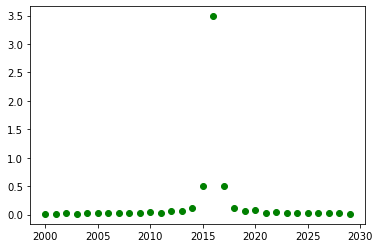

In [ ]:
#plt.imshow(np.log(np.abs(inverse[1500:1500+1000, 1100+380:1100+440])))
s_new2 = np.sum(inverse[1500:1500+1000, 1100+380:1100+440], axis=1)

int_array_new2= integer_array([],1500,1500+1000)

plt.scatter(int_array_new2[500:530], np.abs(s_new2)[500:530], marker='o', color='green') 

In [ ]:
signal.find_peaks(np.abs(s_new2))

plt.

(array([  1,   4,   7,  11,  14,  16,  18,  21,  26,  28,  30,  32,  34,
         37,  39,  42,  45,  48,  52,  56,  59,  62,  65,  68,  70,  72,
         76,  78,  82,  84,  86,  88,  91,  93,  96,  98, 101, 103, 106,
        110, 112, 114, 116, 118, 120, 123, 126, 130, 132, 135, 138, 142,
        144, 148, 150, 152, 154, 157, 160, 163, 167, 170, 172, 174, 176,
        180, 182, 184, 186, 188, 191, 193, 195, 198, 201, 203, 207, 211,
        214, 218, 221, 223, 227, 230, 232, 234, 237, 240, 242, 245, 248,
        250, 253, 255, 258, 261, 263, 265, 269, 271, 273, 275, 278, 281,
        283, 285, 288, 292, 294, 298, 300, 302, 305, 308, 311, 313, 315,
        317, 319, 321, 323, 326, 328, 333, 335, 339, 341, 346, 348, 350,
        353, 356, 358, 360, 363, 366, 368, 370, 372, 374, 376, 378, 381,
        383, 388, 394, 396, 400, 402, 404, 406, 410, 412, 414, 418, 420,
        424, 427, 430, 432, 434, 436, 438, 440, 444, 446, 448, 450, 453,
        456, 458, 460, 462, 464, 466, 468, 470, 472

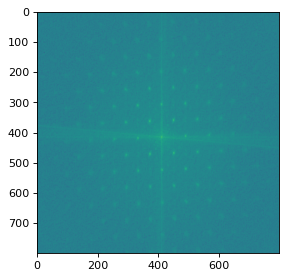

In [ ]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3414238/#:~:text=In%20a%20more%20mathematical%20definition,1)
#trying autocorrelation 
fft_inv = np.fft.fftshift(np.fft.ifft2(np.sqrt(inverse)))
invfft_inv = np.fft.fftshift(np.fft.ifft2(np.sqrt(inverse)))

mag_power_spectrum= fft_inv * invfft_inv 

autocorrelation = np.fft.fftshift(np.fft.ifft2(np.sqrt(mag_power_spectrum)))

plot_inv_array(autocorrelation[1600:2400, 1100:1900])

